# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q2.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Anirudh Kaushik <br>
Roll Number: 2020111015

In [1]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow
!pip install opencv-contrib-python

In [2]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [3]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [5]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


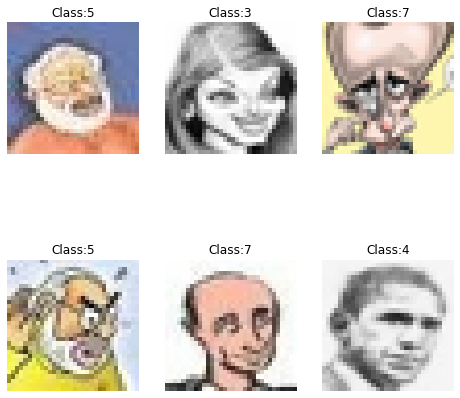

In [6]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [7]:
#data information
# X contain 672 images for all celebrities, images are 32x32 and 3 channel, i.e. colored
# y contains the class (1 of 8) the image belongs to 

In [8]:
def get_mean_img(samples):
    new_samples = []
    for i in samples:
        i = i.flatten()
        new_samples.append(i)
    new_samples = np.array(new_samples)
    print(f"new_samples.shape = {new_samples.shape}")
    mean_img = np.mean(new_samples)
    return np.array(mean_img)
    

In [9]:
# write function
from numpy.linalg import eig
def get_data_matrix(X):
    data_mat = []
    mean_img = get_mean_img(X)
    for i in X:
        i = i.flatten()
        i -= mean_img
        data_mat.append(i)
    data_mat = np.array(data_mat)
    print(f"data_mat.shape = {data_mat.shape}")
    return data_mat

data_mat = get_data_matrix(X)



new_samples.shape = (672, 3072)
data_mat.shape = (672, 3072)


In [10]:
def get_covariance_matrix(data_mat):
    flag = 0
    for i  in data_mat:
        i = np.expand_dims(i, axis=0)
        if not flag:
            A = np.matmul(i.T, i)
            flag = 1
        else:
            A += np.matmul(i.T, i)
        
    print(f"A.shape = {A.shape}")
    A = A/len(data_mat)
    return A
    
cov_mat = get_covariance_matrix(data_mat)

A.shape = (3072, 3072)


In [11]:
def get_eigens(cov_mat):
    w,v = eig(cov_mat)
    idx = w.argsort()[::-1]   
    w = w[idx]
    v = v[:,idx]
    return w,v
w,v = get_eigens(cov_mat)

print(f"number of eigen_values = {w.shape} eigen_vectors = {v.shape}")

number of eigen_values = (3072,) eigen_vectors = (3072, 3072)


#### Compute eigen values and plot eigen value spectrum

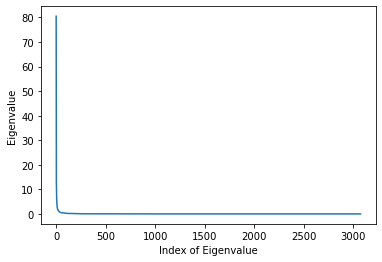

In [12]:
# eigen values and spectrum
def plot_eig_spectrum(w):
    sorted_eig_vals = w.real
    plt.xlabel('Index of Eigenvalue')
    plt.ylabel('Eigenvalue')
    plt.plot(sorted_eig_vals)
    plt.show()
    return sorted_eig_vals
sorted_eig_vals = plot_eig_spectrum(w)

#### Plot the percentage of variances vs the number of principal components

Number of components explaining 95% variance: 197


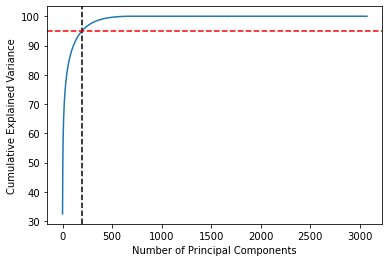

In [13]:
# plot variance vs components
def plot_var_vs_PC(sorted_eig_vals):
    cum_exp_var = np.cumsum(sorted_eig_vals)
    percentage_var = cum_exp_var*100/np.sum(sorted_eig_vals)
    k = np.argmax(percentage_var > 95)
    print(f"Number of components explaining 95% variance: {k}")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.plot(percentage_var)
    plt.axvline(x=k, color="k", linestyle="--")
    plt.axhline(y=95, color="r", linestyle="--")
    plt.show()
    return k,percentage_var
k,percentage_var = plot_var_vs_PC(sorted_eig_vals)

#### Visualize eigen faces(eigen vectors)

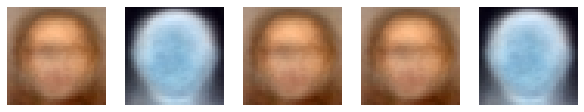

In [14]:
# Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()
# H,W,C = 32,32,3
indices = [randrange(12)+1 for i in range(5)]
plot(v.real,H,W,C, indices)


#### QuestionsTry visualizing these eigen vectors. Comment on what these ghost faces represent
##### Answer:
 - We calculated the covariance matrix for all 672 images and obtained the eigen values and eigen vectors for it. 
 - The Eigen values contain information about the magnitude of variance and the corresponding eigenvector tells us the direction of spread of this variance
 - The ghost faces visualized are simply 5 random eigen vectors that we plotted. Using a linear combination of these eigenvectors we can reconstruct the individual images.
 - We use a set of these eigen vectors chosen on the basis of their eigen values to form a new reduced dimensional space in which we reconstruct the images. These eigenvectors form the basis of this new space.
 
 - Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?

#### Reconstruction 

==== Original Images ====


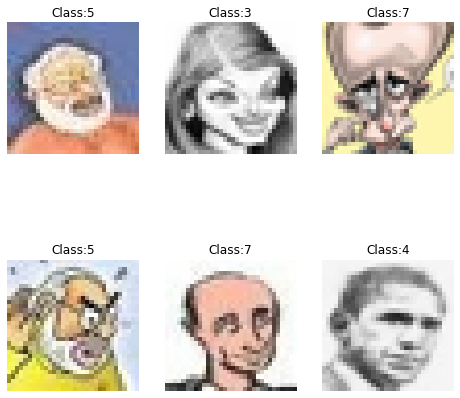

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


==== Reconstructed Images ====


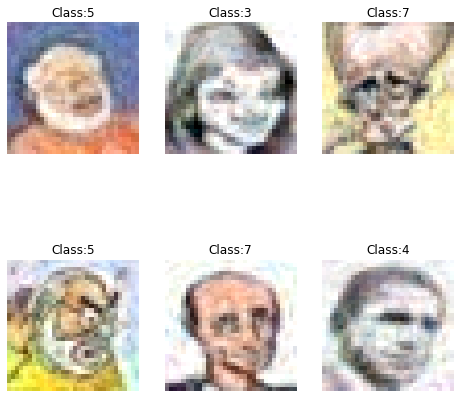

In [15]:
#function for projection matrix
# reconstruction
def reconstruct(X, eig_vecs, k):
    X_reconst = []
    for i in X:
        i = i.flatten()
        X_reconst.append(i)
    X_reconst = np.array(X_reconst)
    eig_vecs = eig_vecs.T # 3072 eigen vector of dimension 3072 each, to get eigenvector we must transform into col vector
    eig_vecs = eig_vecs[:k]
    X_reconst = X_reconst.dot(eig_vecs.T)
    X_reconst = X_reconst.dot(eig_vecs)
    return X_reconst

X_reconst = reconstruct(X, v, k) # Reconstructing using the first 200 eigenvectors
X_reconst = X_reconst.real
X_reconst = X_reconst.reshape((N, H, W, C)) # make 672,32,32,3
print("==== Original Images ====")
display_images(X[ind, ...], y[ind], row=2, col=3) 
print("==== Reconstructed Images ====")
display_images(X_reconst[ind,...],y[ind], row=2,col=3) 

#### Plot data in 2D


#### Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.


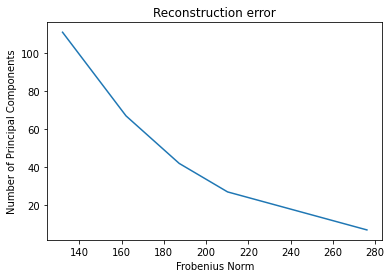

In [16]:
# plot data in 2D
per_var = [90,85,80,75,60]
num_components = [np.argmax(percentage_var > i) for i in per_var]
error_lis = []
for i in num_components:
    X_reconst = reconstruct(X,v,i).real
    X = X.reshape(N,H*W*C)
    error_lis.append(np.linalg.norm(X-X_reconst,'fro'))
error_lis = np.array(error_lis)
plt.title('Reconstruction error')
plt.xlabel('Frobenius Norm')
plt.ylabel('Number of Principal Components')
plt.plot(error_lis,num_components,)
plt.show()

#### Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?
#### Answer:
- Using only the two dominant principal values show that there is no clear separation between classes when projected to only two dimensions as all the classes overlap with no proper way to distinguish them.
- The percentage variance captured using only 2 principal components is a meagerly 42.04% which is not sufficient to properly distinguish the various classes.
- In order to properly separate the classes we need to capture higher variance between the classes and this we will need to use a larger number of principal components

(672, 2)
Variance captured using only two Principal components: 42.04%


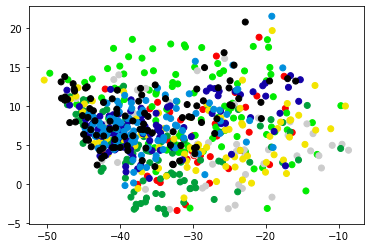

In [17]:
pts = np.dot(X,v.real[:,:2])
print(pts.shape)
plt.scatter(pts[:,0], pts[:,1], c=y, cmap=plt.cm.get_cmap('nipy_spectral_r', len(cfw_dict))) # scatter plot
print(f"Variance captured using only two Principal components: {round(percentage_var[1],2)}%")

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [18]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

In [19]:
# separate into classes
classes = [[] for i in range(len(cfw_dict))]
for ind, i in enumerate(X):
    classes[y[ind]].append(i)

new_samples.shape = (50, 3072)
data_mat.shape = (50, 3072)
A.shape = (3072, 3072)
==== Amitabhbachan ====


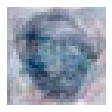

new_samples.shape = (42, 3072)
data_mat.shape = (42, 3072)
A.shape = (3072, 3072)
==== AamirKhan ====


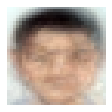

new_samples.shape = (79, 3072)
data_mat.shape = (79, 3072)
A.shape = (3072, 3072)
==== DwayneJohnson ====


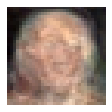

new_samples.shape = (101, 3072)
data_mat.shape = (101, 3072)
A.shape = (3072, 3072)
==== AishwaryaRai ====


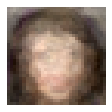

new_samples.shape = (100, 3072)
data_mat.shape = (100, 3072)
A.shape = (3072, 3072)
==== BarackObama ====


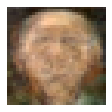

new_samples.shape = (100, 3072)
data_mat.shape = (100, 3072)
A.shape = (3072, 3072)
==== NarendraModi ====


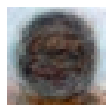

new_samples.shape = (100, 3072)
data_mat.shape = (100, 3072)
A.shape = (3072, 3072)
==== ManmohanSingh ====


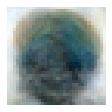

new_samples.shape = (100, 3072)
data_mat.shape = (100, 3072)
A.shape = (3072, 3072)
==== VladimirPutin ====


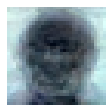

In [20]:
# visualize
eigenval_lis = []
eigenvec_lis = []
for ind,clas in enumerate(classes):
    data_matrix = get_data_matrix(clas)
    cov_matrix = get_covariance_matrix(data_matrix)
    eig_vals,eig_vecs = get_eigens(cov_matrix)
    eigenval_lis.append(eig_vals)
    eigenvec_lis.append(eig_vecs)
    print(f"==== {list(cfw_dict.keys())[list(cfw_dict.values()).index(ind)]} ====")
    plot(eig_vecs.real, H, W, C, [0])

In [21]:
def get_cum_var(sorted_eig_vals, per_var_req):
    cum_exp_var = np.cumsum(sorted_eig_vals)
    percentage_var = (cum_exp_var*100)/np.sum(sorted_eig_vals)
    k = np.argmax(percentage_var >= per_var_req)
#     print(f"Number of components with cumulative explained variance {per_var_req}% : {k}")
    return k,percentage_var


#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [22]:
# components required
print(f"Entire Dataset = {np.argmax(percentage_var >= 90)}")
for ind,clas in enumerate(classes):
    K,per_var = get_cum_var(eigenval_lis[ind].real,90)
    print(f"{list(cfw_dict.keys())[list(cfw_dict.values()).index(ind)]} = {K}")


Entire Dataset = 111
Amitabhbachan = 20
AamirKhan = 22
DwayneJohnson = 26
AishwaryaRai = 34
BarackObama = 38
NarendraModi = 54
ManmohanSingh = 47
VladimirPutin = 42


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

#### observation/analysis
- The number of components required to capture 90% variance in each class and across the entire dataset are not the same
- This is because the interclass variability is considerably higher than intra class variability since the cartoon faces of the same person vary less than the cartoon faces of different individuals
- Due to this the variation across the entire dataset requires a larger number of principal components (111) to capture 90% variation as compared to the number of principal components required to capture this much variation inside each class (around 20 to 50) as images within each class have less variation and thus less number of components are able to capture most of the information about the class.
- Capturing information about all the different faces would thus require a larger number of principal components, this makes intutive sense as well.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [23]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [24]:
# code here
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size = 0.2, random_state=0)

reg = LinearRegression()
reg.fit(X_train,y_train)
score = reg.score(X_test,y_test)
print(f"Score for simple linear regression on test set: {score}")

Score for simple linear regression on test set: 0.9704959608684335


In [25]:
# Linear Regression with PCA
from tqdm import tqdm
error_lis = []
for n_components in tqdm(range(1,201)):
    X_train, X_test, y_train, y_test = train_test_split(X, label, test_size = 0.2, random_state=0)

    # PCA
    model = PCA(n_components=n_components)
    X_train = model.fit_transform(X_train)
    X_test = model.transform(X_test) # Apply dimensionality reduction to X.

    # Linear Regression
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    score = reg.score(X_test,y_test)
    error_lis.append(score)


    

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:57<00:00,  3.46it/s]


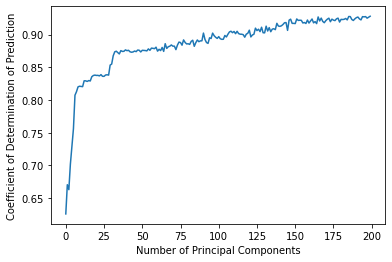

Maximum score is 0.93 for 200 components


In [26]:
# analysis / plot (split the cells if required)
plt.xlabel('Number of Principal Components')
plt.ylabel('Coefficient of Determination of Prediction')
plt.plot(error_lis)
plt.show()

print(f"Maximum score is {round(max(error_lis),2)} for {error_lis.index(max(error_lis))+1} components")

#### Analysis and Observations
- The score used here is the inbuilt coefficient of dertermination of prediction score which is 1.0 for a set of perfect predictions, i.e., the linear model perfectly fits the data
- We observe that the score increases with increase in the number of principal components used.
- As we can see, we obtain the maximum score when 200 components are used.
- The rate of increase in accuracy decreases gradually, almost stabalising in the 175 to 200 range meaning that approximately 175 principal components are able to capture most of the features of the data properly.